# Name: Syed Muhammad Faheem
# Task 1

## Introduction to Task and Basic Terminologies

### Task
    Predict the percentage of the student based on the number of study hours using supervised machine learning.

### Simple Linear Regression (Definition)
            It is a way to model a relationship between two sets of variables. The result is a linear regression equation that can be used to make predictions about data. Simple linear regression plots one independent variable X against one dependent variable Y. Technically, in regression analysis, the independent variable is usually called the predictor variable and the dependent variable is called the criterion variable.

## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score

## Importing Dataset

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")        # importing the dataset using the "read_csv" function from pandas
df = df.replace('',np.nan)                    # removing the NaN values if they exist
df = df.dropna(axis="rows")
print("Displaying the Dataset")
df

Displaying the Dataset


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## Plotting the Dataset using Scatter plot

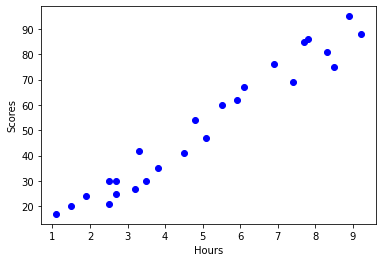

In [31]:
Hours= df['Hours']
Scores= df['Scores']
plt.scatter(Hours,Scores,color='blue')        #plotting the hours of study and and scores wrt to them
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

## Training, Testing and Splitting

In [27]:
X = df.iloc[:, :-1].values        #selecting values through position index
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

## Training the Model

In [25]:
regressor = LinearRegression()        #applying linear regression on the trained data
regressor.fit(X_train, y_train)

LinearRegression()

## Applying Simple Linear Regression on Training Set

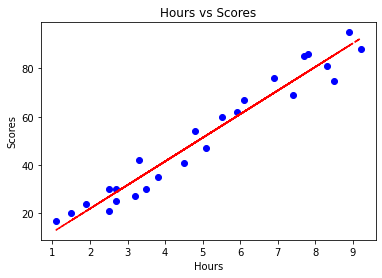

Slope:  [9.78856669]
Intercept:  2.370815382341881


In [32]:
def myfunc(X):
  return regressor.coef_*X+regressor.intercept_

mymodel = list((map(myfunc, X)))        #calculating the slope and intercept

plt.title("Hours vs Scores")
plt.scatter(X,y,color='blue')
plt.plot(X,mymodel,color='red',linestyle='--')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()        #plotting the simple regression model

print('Slope: ',regressor.coef_)
print('Intercept: ',regressor.intercept_)

## Predicting the Test Results

In [33]:
y_pred = regressor.predict(X_test)
print("The predicted scores are: ",y_pred)

The predicted scores are:  [17.05366541 33.69422878 74.80620886 26.8422321  60.12335883 39.56736879
 20.96909209 78.72163554]


## Visualizing the Test and Training Models

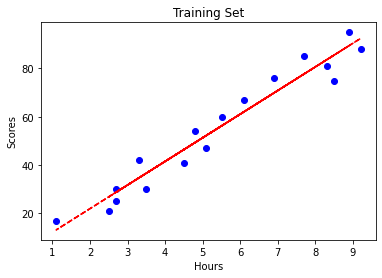

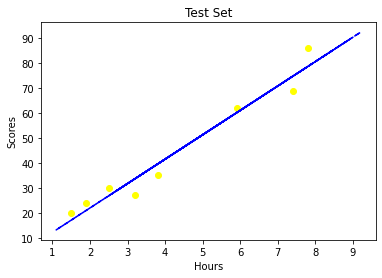

In [36]:

plt.title("Training Set")
plt.scatter(X_train,y_train,color='blue')
plt.plot(X_train, regressor.predict(X_train),color='red',linestyle='--')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()




plt.title("Test Set")
plt.scatter(X_test,y_test,color='yellow')
plt.plot(X_train, regressor.predict(X_train),color='blue',linestyle='--')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()


## Comparing the Actual and Predicted Scores

In [37]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


## Query Answered

In [40]:
df = np.array(9.25)
df = df.reshape(-1, 1)
pred = regressor.predict(df)
print("The predicted score of the student if he studies 9.25 hours/day will be {}.".format(pred))

The predicted score of the student if he studies 9.25 hours/day will be [92.91505723].


## Errors and Ommissions

In [42]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print("The Correlation of the model is: ",r2_score(y_test,y_pred))

Mean Absolute Error: 4.419727808027652
The Correlation of the model is:  0.9568211104435257


## Conclusion
It can be concluded that if the student studies for around 9.25 hours per day approx he can achieve a total score of 93 rounded off on the basis of the prediction model. 